In [1]:
import datetime
import csv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os #システム操作系
from pathlib import Path #ファイル操作系
from createdatas3 import intensity, gaussian_beam
from scipy.optimize import curve_fit    # フィッティング用
from scipy.stats import norm

In [4]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, '201215')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/201215


In [5]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ

plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 2.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 2.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離

plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 0.4        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

In [6]:
experiments_file = '2020-12-12_16-21_experiments.pkl'
#実験データ読み込み
with open(experiments_file, mode="rb") as f:
    experiments = pickle.load(f)

print(experiments.shape)

(50, 1360, 1024)


In [7]:
#平均と標準偏差の計算
ave_exp = np.average(experiments, axis=0)
std_exp = np.std(experiments, axis=0)

現在時刻： 2020-12-15 19:33:50.373876


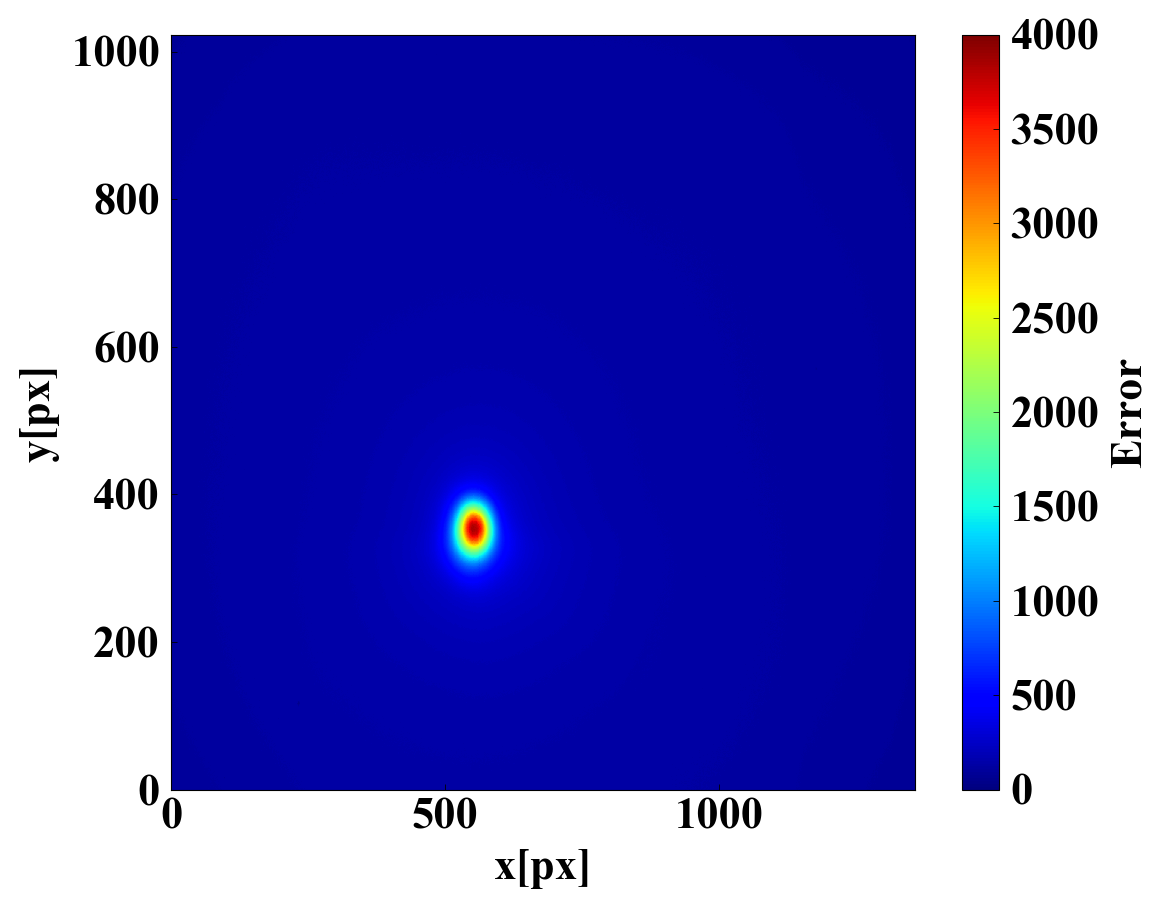

保存ファイル名： 2020-12-15_19-33_exp_jet.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201215/2020-12-15_19-33_exp_jet.png


In [8]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

xexp_array = range(experiments.shape[1])
yexp_array = range(experiments.shape[2])
xexp_grid, yexp_grid = np.meshgrid(xexp_array, yexp_array)

#全面カラーマップ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_exp_jet.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(xexp_grid.T, yexp_grid.T, ave_exp, cmap='jet', vmin=0.0, vmax=4000.0)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
#fig.savefig(save_file)
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [10]:
idx = np.unravel_index(np.argmax(ave_exp), ave_exp.shape)

print(ave_exp[idx[0],idx[1]])

3855.62


In [11]:
#表示データ抽出
size = 100
ave = ave_exp[idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
std = std_exp[idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)

In [12]:
#2D楕円ガウシアンビームの関数の定義
pi = np.pi
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 4000.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
ave = ave.flatten()
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), ave, p0=param_ini, maxfev=2000)
intensity_fit_xy = gaussian_beam_xy((x_grid.T, y_grid.T), *param)
#結果の表示
print(f'ガウスparam: {param}')
error = (ave.flatten() - intensity_fit_xy.flatten()).reshape(nx,ny)
std_error = np.std(error)
ave_error = np.average(error)
print(f'残差:{ave_error}±{std_error}')

#パラメータ保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_fit-param.pkl'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
with open(save_file, mode='wb') as f:
    pickle.dump(param, f)
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
experiments_file = save_file

ガウスparam: [3.54279312e+03 1.06184392e-03 5.53375228e+02 3.51767425e+02
 4.69499075e+01 5.12736543e+01 2.74091184e+02]
残差:4.178164235781878e-08±56.1817999969015
現在時刻： 2020-12-15 19:34:27.180292
保存ファイル名： 2020-12-15_19-34_fit-param.pkl
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201215/2020-12-15_19-34_fit-param.pkl


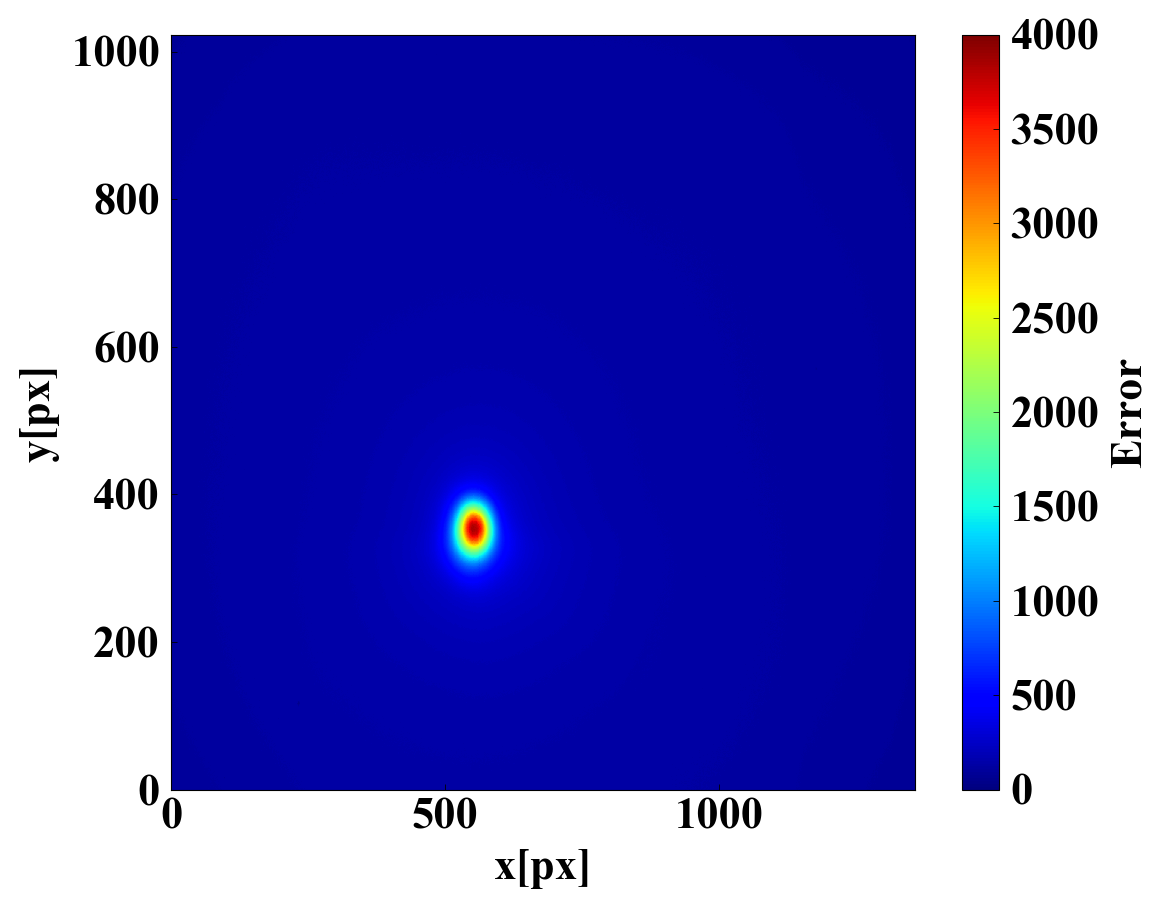

保存ファイル名： 2020-12-15_19-34_exp_jet.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201215/2020-12-15_19-34_exp_jet.png


In [13]:
#オフセット処理
experiments_h = experiments - param[4]

#全面カラーマップ表示
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_exp_jet.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.set_xlabel("x[px]", fontsize=16)
ax.set_ylabel("y[px]", fontsize=16)
ax.tick_params(labelsize=16)
mappable = ax.pcolormesh(xexp_grid.T, yexp_grid.T, ave_exp, cmap='jet', vmin=0.0, vmax=4000.0)
cbar = fig.colorbar(mappable, ax=ax)
cbar.set_label("Error", fontsize=16)
cbar.ax.tick_params(labelsize=16)
#fig.savefig(save_file)
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [14]:
#平均と標準偏差の計算
ave_exp_h = np.average(experiments_h, axis=0)
std_exp_h = np.std(experiments_h, axis=0)

In [15]:
#表示データ抽出
size = 100
ave = ave_exp_h[idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
std = std_exp_h[idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)

現在時刻： 2020-12-15 19:36:07.311728
y = 0.00738x + 6.34001
y^2 = 0.2323467x+0.2323467


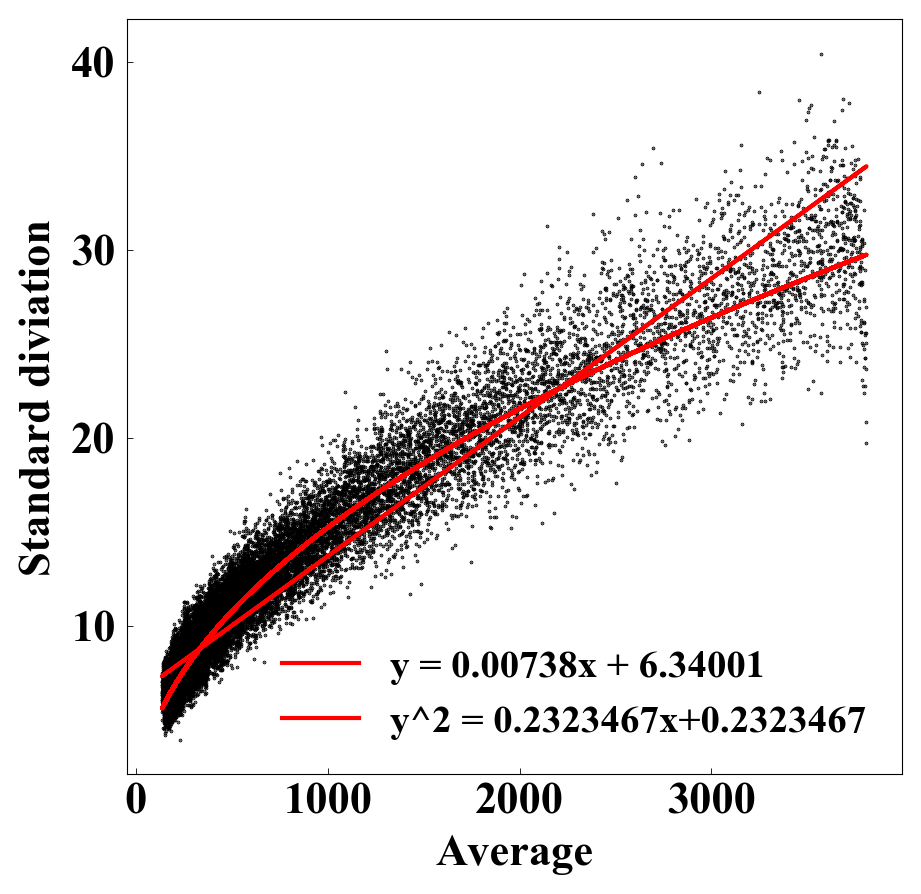

保存ファイル名： 2020-12-15_19-36_ave-std.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201215/2020-12-15_19-36_ave-std.png
線形Fの平均絶対残差: 1.1023166121425383±1.0360297823752498
非線形Fの平均絶対残差: 0.9162669346232449±0.8711590242787535


In [18]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

#非線形Fの関数
def fit_func(x,p,q):
    return np.sqrt(x*p)+q

#グラフ
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'_ave-std.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel("Average", fontsize=16)
ax.set_ylabel("Standard diviation", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.scatter(ave, std, color='black', s=0.1)

#線形フィッティング
a, b = np.polyfit(ave.flatten(), std.flatten(), 1)
fitting = a*ave.flatten() + b
a1 = f'{a:.5f}'
b1 = f'{b:.5f}'
print(f'y = {a1}x + {b1}') 
ax.plot(ave.flatten(), fitting, color='red', label=f'y = {a1}x + {b1}')

#非線形フィッティング
param_ini = np.array([0.001, 0.0])
param, cov  = curve_fit(fit_func, ave.flatten(), std.flatten(), p0=param_ini, maxfev=2000)
fitting2 = np.sqrt(param[0]*ave.flatten())
c1 = f'{param[0]:.7f}'
d1 = f'{param[0]:.7f}'
print(f'y^2 = {c1}x+{d1}')
#ax.plot(ave.flatten(), fitting2, color='red', label=f'y^2 = {c1}x+{d1}')
plt.legend(frameon=False)
#ax.set_xlim(0.0, 1.0)
fig.savefig(save_file, format="png", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
error = std.flatten() - fitting
ave_error = np.average(abs(error))
std_error = np.std(abs(error))
print(f'線形Fの平均絶対残差: {ave_error}±{std_error}')
error = std.flatten() - fitting2
ave_error = np.average(abs(error))
std_error = np.std(abs(error))
print(f'非線形Fの平均絶対残差: {ave_error}±{std_error}')